# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

# [作業目標]
- 練習填入對應的欄位資料或公式, 完成題目的要求 

# [作業重點]
- 填入適當的輸入資料, 讓後面的程式顯示題目要求的結果 (Hint: 填入對應區間或欄位即可, In[4]~In[6], Out[4]~In[6])
- 填入z轉換的計算方式, 完成轉換後的數值 (Hint: 參照標準化公式, In[7])

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 設定 data_path
dir_data = '../data/'

In [3]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ../data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [7]:
#1
"""
Your code here
"""
# cut_rule = [1, 2, 3, 5, 10000]
cut_rule = [-np.inf, 0, 2, 5, np.inf]
labels = ['0 kids', '1~2 kids', '3~5 kids', 'over 5 kids']

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, bins=cut_rule, labels=labels, include_lowest=True)
app_train['CNT_CHILDREN_GROUP'].value_counts()

0 kids         215371
1~2 kids        87868
3~5 kids         4230
over 5 kids        42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [8]:
#2-1
"""
Your code here
"""
grp = ['CNT_CHILDREN_GROUP', 'TARGET']

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
print(grouped_df.mean())

CNT_CHILDREN_GROUP  TARGET
0 kids              0         166747.010980
                    1         160804.210548
1~2 kids            0         174590.584401
                    1         176115.362720
3~5 kids            0         175053.742913
                    1         160677.385714
over 5 kids         0         139159.090909
                    1         180000.000000
Name: AMT_INCOME_TOTAL, dtype: float64


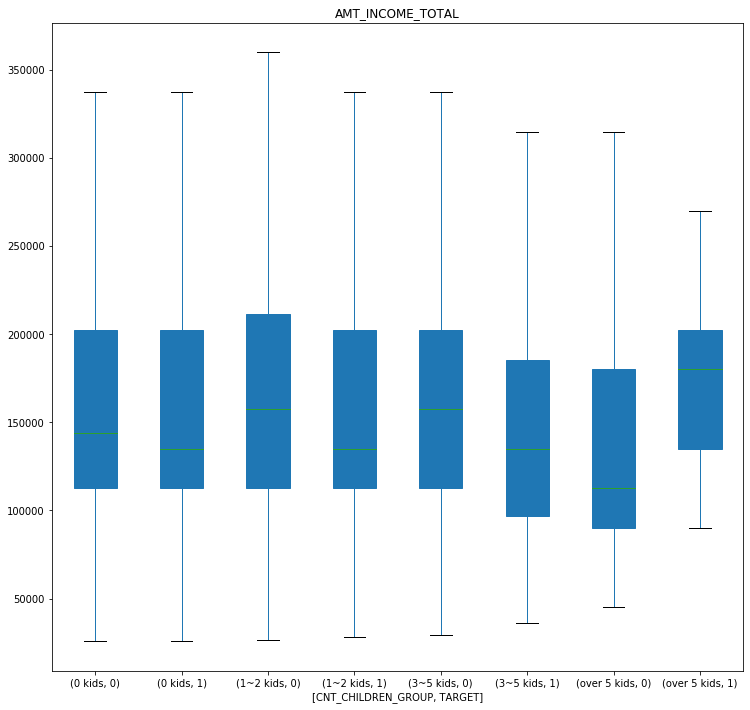

In [9]:
#2-2
"""
Your code here
"""
plt_column = ['AMT_INCOME_TOTAL']
plt_by = ['CNT_CHILDREN_GROUP', 'TARGET']

app_train.boxplot(by=plt_by, column=plt_column, showfliers=False, figsize=(12,12), patch_artist=True, grid=False)
plt.suptitle('')
plt.show()

In [10]:
#3
"""
Your code here
"""
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x:(x-x.mean())/x.std())
print(app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'])
app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

0         0.491521
1         0.972434
2        -0.934706
3        -0.298993
4        -0.426135
5        -0.638040
6        -0.029872
7         1.820052
8        -0.510897
9        -0.298993
10       -0.516569
11       -1.208589
12       -0.934706
13        0.419386
14        0.209578
15       -0.087088
16       -0.553278
17       -0.778636
18       -0.510897
19       -0.703759
20       -0.298993
21        0.232195
22        2.291295
23       -0.786373
24       -0.329378
25       -0.722802
26       -0.569423
27       -0.516569
28        0.972434
29       -0.722802
            ...   
307481    0.756757
307482    0.548625
307483   -0.638040
307484    3.515288
307485    0.793768
307486    0.980959
307487   -0.468516
307488   -0.087088
307489    0.756757
307490   -0.807563
307491   -0.703759
307492    3.939097
307493   -0.298993
307494    0.793768
307495    0.124816
307496    1.820052
307497    0.124816
307498    0.294340
307499   -0.807563
307500    0.887673
307501   -0.833494
307502   -0.

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.491521
1,270000.0,0.972434
2,67500.0,-0.934706
3,135000.0,-0.298993
4,121500.0,-0.426135
